# Linear Regression from Scratch
## Table of Contents
* Learn Steepness m but NOT Bias b yet
* Learn Steepness m AND Bias b
* Learn Steepness m and Bias b WITH Vectorization
* Compare Vectorized vs non-Vectorized

In [1]:
# imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 1. Learn Steepness m but NOT Bias b yet
**Linear Function**
$$k = m \cdot x + b$$

**For Simplicity no bias yet**
$$k = m \cdot x$$

We choose a random value for the variable m below. In this case m=3 and defines the steepness of our linear function. We use this value to generate 100 noisy datapoints but we **DO NOT TELL** our Linear Regression model. The goal of the Regression Model is to figure out this value by itself.

In [2]:
m = 3 # the parameter we need to generate some test data and our Model will figure out without telling it 

In [3]:
# generate 100 random linear datapoints from x=-1 to x=1 --> the range(-1, 1)=2 and 2/0.02=100 datapoints
x = np.arange(-1, 1, 0.02)
noise = np.random.uniform(-1, 1, size=100)
y = (m*x) + noise

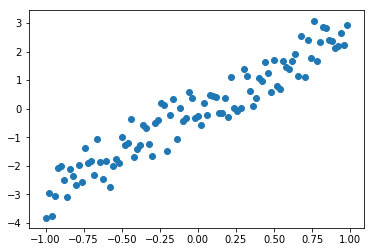

In [4]:
plt.scatter(x, y)

Random initialization (we choose -2) of our steepness parameter. This parameter gets updated in the direction of m with Gradient Descent (Algorithm in function: train_linear_function())

In [5]:
w = -2 # random chosen value

In [6]:
y_hat = w*x

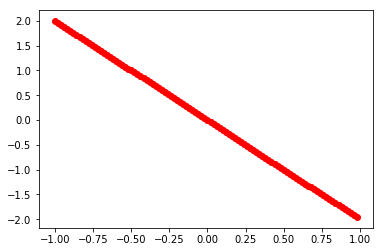

In [7]:
plt.scatter(x, y_hat, color='red')

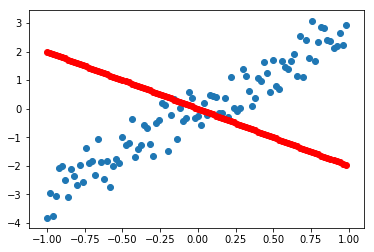

In [8]:
# both images in one
plt.scatter(x, y)
plt.scatter(x, y_hat, color='red')

We meassure the distances between every datapoint to the red line and square the result. Squaring ensures that we have a positive measure.

In [9]:
def squared_error(y, y_hat):
    return [(y[i]-y_hat[i])**2 for i in range(len(y))]

Now we want a line that fits the data. So we sum over the squared_error results and divide by the number of datapoints (100 in our case). The red line fits the data when this value is minimal. The below algorithm (Gradient Descent) Figures this out.

In [10]:
def train_linear_regression(x_data, y_data, weight, n_epochs, lr=0.2):
    mse = [] #list to keep track of our errors
    n_datapoints = x_data.shape[0] # number of datapoints
    # an epoch is how often we see every data point ... n_epochs=5 then we see every datapoint 5 times
    for epoch in range(n_epochs):
        y_list = [] 
        y_hat_list = [] 
        # go through all datapoints
        for i in range(n_datapoints):
            y_ = y_data[i] # our actual y's
            y_hat_ = weight * x_data[i] # our predicted outputs with the current weight value

            y_list.append(y_)
            y_hat_list.append(y_hat_)
        
        # the line below is where the magic happens (Derivative of the Mean Squared Error function)
        weight = weight - lr*((2/n_datapoints)*sum([y_hat_list[i]-y_list[i] for i in range(n_datapoints)]*x_data))
        
        mse.append(sum(squared_error(y_list, y_hat_list))/n_datapoints)
        print(epoch+1, ".Epoch -->", " weight: ", weight, ", MSE: ", mse[epoch])
    
    return mse, weight

In [11]:
mse, weight = train_linear_regression(x, y, w, 100)

1 .Epoch -->  weight:  -1.3590223178337983 , MSE:  7.965209482827219
2 .Epoch -->  weight:  -0.803525419361282 , MSE:  6.047925724155761
3 .Epoch -->  weight:  -0.3221095872690599 , MSE:  4.607921209617313
4 .Epoch -->  weight:  0.09510462945534304 , MSE:  3.5263843778819854
5 .Epoch -->  weight:  0.4566791582373796 , MSE:  2.7140800367563607
6 .Epoch -->  weight:  0.7700341078610436 , MSE:  2.1039867664672443
7 .Epoch -->  weight:  1.0416000414028959 , MSE:  1.6457671317718456
8 .Epoch -->  weight:  1.2769499420476065 , MSE:  1.301614452426794
9 .Epoch -->  weight:  1.4809135799423385 , MSE:  1.0431334583089586
10 .Epoch -->  weight:  1.657676627087429 , MSE:  0.8489974589981483
11 .Epoch -->  weight:  1.8108665542652502 , MSE:  0.7031887261083891
12 .Epoch -->  weight:  1.9436270727546372 , MSE:  0.5936769062378263
13 .Epoch -->  weight:  2.0586826484982796 , MSE:  0.511426423336847
14 .Epoch -->  weight:  2.15839441266075 , MSE:  0.4496509734772763
15 .Epoch -->  weight:  2.24480861

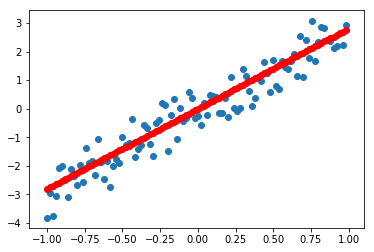

In [12]:
plt.scatter(x, y)
plt.scatter(x, x*weight, color='red')

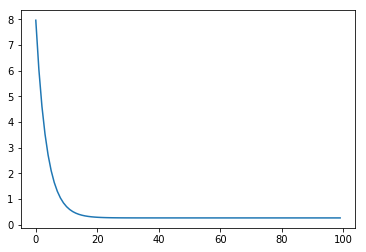

In [13]:
plt.plot(mse)

## 2. Learn Steepness m AND Bias b
**Linear Function**
$$k = m \cdot x + b$$

In [14]:
# the parameter we need to generate some test data and our Model will figure out without telling it
m = 3
b = 2

In [15]:
# generate 100 random linear datapoints from x=-1 to x=1 --> the range(-1, 1)=2 and 2/0.02=100 datapoints
x = np.arange(-1, 1, 0.02)
noise = np.random.uniform(-1, 1, size=100)
y = (m*x)+ b + noise

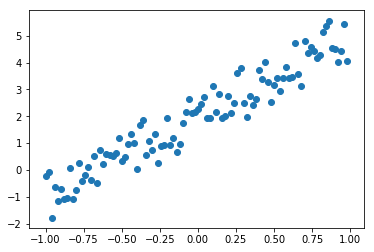

In [16]:
plt.scatter(x, y)

In [17]:
w_m = -2
w_b = 5

In [18]:
y_hat = w_m*x + w_b

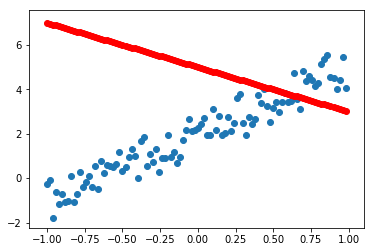

In [19]:
plt.scatter(x, y)
plt.scatter(x, y_hat, color='red')

In [20]:
def train_linear_regression_with_bias(x_data=x, y_data=y, weight_m=w_m, weight_b=w_b, n_epochs=100, lr=0.2):
    mse = [] #list to keep track of our errors
    n_datapoints = x_data.shape[0] # number of datapoints
    # an epoch is how often we see every data point ... n_epochs=5 then we see every datapoint 5 times
    for epoch in range(n_epochs):
        y_list = [] 
        y_hat_list = [] 
        # go through all datapoints
        for i in range(n_datapoints):
            y_ = y_data[i] # our actual y's
            y_hat_ = weight_m * x_data[i] + weight_b# our predicted outputs with the current weight value

            y_list.append(y_)
            y_hat_list.append(y_hat_)
        
        # the line below is where the magic happens (Derivative of the Mean Squared Error function)
        weight_m = weight_m - lr*((2/n_datapoints)*sum([y_hat_list[i]-y_list[i] for i in range(n_datapoints)]*x_data))
        # the only changing line below (Derivative with respect to Bias b)
        weight_b = weight_b - lr*((2/n_datapoints)*sum([y_hat_list[i]-y_list[i] for i in range(n_datapoints)]))
        
        mse.append(sum(squared_error(y_list, y_hat_list))/n_datapoints)
        #print(epoch+1, ".Epoch -->", " m: ", weight_m, ", b: ", weight_b, ", MSE: ", mse[epoch])
    
    return mse, weight_m, weight_b

In [21]:
mse, weight_m, weight_b = train_linear_regression_with_bias(x, y, w_m, w_b, 100)

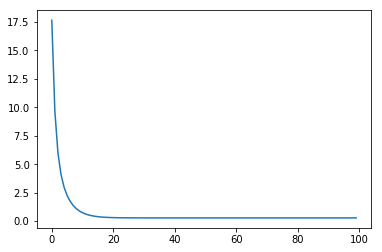

In [22]:
plt.plot(mse)

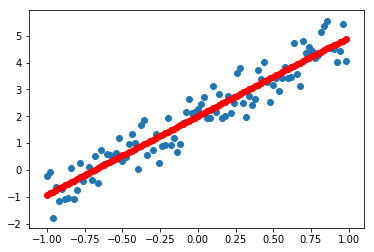

In [23]:
plt.scatter(x, y)
plt.scatter(x, x*weight_m + weight_b, color='red')

## 3. Learn Steepness m and Bias b WITH Vectorization

In [24]:
# the parameter we need to generate some test data and our Model will figure out without telling it
m = 3
b = 2

In [25]:
# generate 100 random linear datapoints from x=-1 to x=1 --> the range(-1, 1)=2 and 2/0.02=100 datapoints
x = np.arange(-1, 1, 0.02)
noise = np.random.uniform(-1, 1, size=100)
y = (m*x)+ b + noise

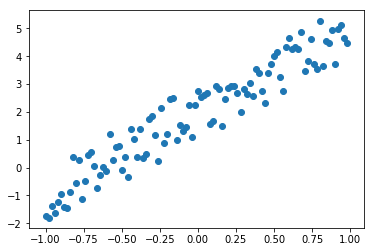

In [26]:
plt.scatter(x, y)

In [27]:
w_m = -2
w_b = 5

In [28]:
y_hat = w_m*x + w_b

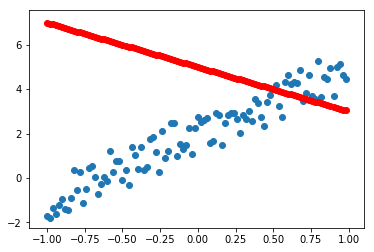

In [29]:
plt.scatter(x, y)
plt.scatter(x, y_hat, color='red')

In [30]:
# now we assume y and y_hat are numpy arrays
def mean_squared_error(y_hat, y):
    return ((y_hat-y)**2).mean()

In [31]:
# some test
mean_squared_error(x, x)

0.0

In [32]:
def train_linear_regression_vectorized(x_data=x, y_data=y, weight_m=w_m, weight_b=w_b, n_epochs=100, lr=0.1):
    mse = []
    n_datapoints = x_data.shape[0]
    for epoch in range(n_epochs):
        y_hat = weight_m*x + weight_b
        
        mse.append(mean_squared_error(y_hat, y_data))
        
        weight_m = weight_m - lr*((2/n_datapoints) * (x_data.T@(y_hat - y_data)))
        weight_b = weight_b - lr*((2/n_datapoints) * (y_hat - y_data).sum())
        
        #print('weight_m: ', weight_m, ', weight_b: ', weight_b, ', MSE: ', mse[epoch])
    
    return mse, weight_m, weight_b

In [33]:
mse, weight_m, weight_b = train_linear_regression_vectorized()

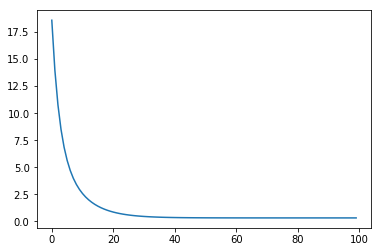

In [34]:
plt.plot(mse)

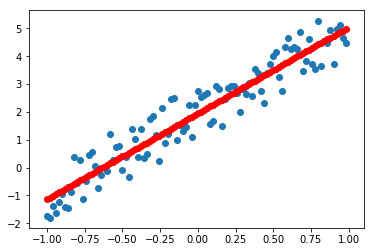

In [35]:
plt.scatter(x, y)
plt.scatter(x, x*weight_m + weight_b, color='red')

## 4. Compare Vectorized vs non-Vectorized

In [36]:
# generate 1000 random linear datapoints from x=-1 to x=1 --> the range(-1, 1)=2 and 2/0.002=1000 datapoints
x = np.arange(-1, 1, 0.00002)
noise = np.random.uniform(-1, 1, size=100000)
y = (m*x)+ b + noise

In [37]:
%time mse, m, b = train_linear_regression_with_bias(x, y, n_epochs=1000)

CPU times: user 3min 6s, sys: 4.14 s, total: 3min 10s
Wall time: 3min 23s


In [38]:
%time mse, m, b = train_linear_regression_vectorized(x, y, n_epochs=1000)

CPU times: user 1.87 s, sys: 196 ms, total: 2.07 s
Wall time: 1.35 s


In [39]:
(2*60+44)/754e-3

217.50663129973475